# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Clouds.all, Sys.country, dt, main.humidity, Coord.lng, coord.lat, main.temp_max, wind.speed
new_cities = []
cloudiness = [] 
country = [] 
date = [] 
humidity =[]
lat = []
lng = [] 
max_temp = [] 
wind_speed = []

print("Beginning Data Retrieval")
print("-----------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
count = 1
record = 1

query_url = f"{url}appid={weather_api_key}&units={units}&q="

for city in cities:
   
    weather_response = requests.get(query_url + city).json()
    
    try:
          #if record <= 50:
        print(f"Processing Record {record}: {city}")         #of Set {count} | 
        record += 1
        #else:
            #record = 1
            #count += 1  

        cloudiness.append(weather_response["clouds"]["all"])
        country.append(weather_response["sys"]["country"])
        date.append(weather_response["dt"])
        humidity.append(weather_response["main"]["humidity"])
        lat.append(weather_response["coord"]["lat"])
        lng.append(weather_response["coord"]["lon"])
        max_temp.append(weather_response["main"]["temp_max"])
        wind_speed.append(weather_response["wind"]["speed"])
        new_cities.append(weather_response["name"]) 
       
        
    except:
        print(f"City not found. Skipping...")
        pass

print(f"-----------------------------") 
print(f"Data Retrieval Complete ")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1: sentyabrskiy
City not found. Skipping...
Processing Record 2: barrow
Processing Record 3: ushuaia
Processing Record 4: tsihombe
City not found. Skipping...
Processing Record 5: bluff
Processing Record 6: vaini
Processing Record 7: kapit
Processing Record 8: kloulklubed
Processing Record 9: ilulissat
Processing Record 10: puerto ayora
Processing Record 11: lososina
Processing Record 12: albany
Processing Record 13: tuktoyaktuk
Processing Record 14: beyneu
Processing Record 15: punta arenas
Processing Record 16: amderma
City not found. Skipping...
Processing Record 17: ewa beach
Processing Record 18: busselton
Processing Record 19: new norfolk
Processing Record 20: kaitangata
Processing Record 21: galgani
City not found. Skipping...
Processing Record 22: ust-nera
Processing Record 23: huetamo
City not found. Skipping...
Processing Record 24: barga
Processing Record 25: chokurdakh
Processing Record 26: mar del pla

Processing Record 244: husavik
Processing Record 245: dubenskiy
City not found. Skipping...
Processing Record 246: bathsheba
Processing Record 247: omaha
Processing Record 248: tutoia
Processing Record 249: thompson
Processing Record 250: olafsvik
Processing Record 251: mongo
Processing Record 252: solovetskiy
City not found. Skipping...
Processing Record 253: quimper
Processing Record 254: totness
Processing Record 255: mount gambier
Processing Record 256: ixtapa
Processing Record 257: funadhoo
Processing Record 258: whithorn
Processing Record 259: languyan
Processing Record 260: carmen
Processing Record 261: tuatapere
Processing Record 262: pemba
Processing Record 263: nipawin
Processing Record 264: viana
Processing Record 265: poltavka
Processing Record 266: salalah
Processing Record 267: acapulco
Processing Record 268: sola
Processing Record 269: xining
Processing Record 270: lompoc
Processing Record 271: panama city
Processing Record 272: georgetown
Processing Record 273: almonte


Processing Record 484: nassjo
Processing Record 485: yanchukan
City not found. Skipping...
Processing Record 486: dwarka
Processing Record 487: carauari
Processing Record 488: camocim
Processing Record 489: formosa
Processing Record 490: severo-kurilsk
Processing Record 491: yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 492: resistencia
Processing Record 493: dori
Processing Record 494: touros
Processing Record 495: harper
Processing Record 496: vidim
Processing Record 497: senno
Processing Record 498: lokhvytsya
Processing Record 499: naugachhia
Processing Record 500: bulaevo
Processing Record 501: meybod
Processing Record 502: nacala
Processing Record 503: ozernovskiy
Processing Record 504: dawson creek
Processing Record 505: havoysund
Processing Record 506: dongsheng
Processing Record 507: umzimvubu
City not found. Skipping...
Processing Record 508: minab
Processing Record 509: jacmel
Processing Record 510: ilo
Processing Record 511: mazatlan
Processing Record 512

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
print(f"Cities: {len(new_cities)}")
print(f"Cloudiness: {len(cloudiness)}")
print(f"Country: {len(country)}")
print(f"Date: {len(date)}")
print(f"Humidity: {len(humidity)}")
print(f"Lat: {len(lat)}")
print(f"Lon: {len(lng)}")
print(f"Max Temp: {len(max_temp)}")
print(f"Wind Speed: {len(wind_speed)}")


Cities: 571
Cloudiness: 571
Country: 571
Date: 571
Humidity: 571
Lat: 571
Lon: 571
Max Temp: 571
Wind Speed: 571


In [5]:
weather_dict = {
    "City": new_cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lon":lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

weather_data_final = pd.DataFrame(weather_dict)
weather_data_final.to_csv("../output_data/weather_data_final.csv", encoding = "utf-8", index=False)
weather_data_final.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
0,Barrow,40,US,1584225863,77,71.29,-156.79,6.80,27.51
1,Ushuaia,40,AR,1584225855,62,-54.80,-68.30,53.60,6.93
2,Bluff,100,NZ,1584225854,75,-46.60,168.33,61.00,4.00
3,Vaini,75,TO,1584226358,79,-21.20,-175.20,86.00,18.34
4,Kapit,100,MY,1584226358,99,2.02,112.93,74.07,1.88


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [10]:
current_date = datetime.now()

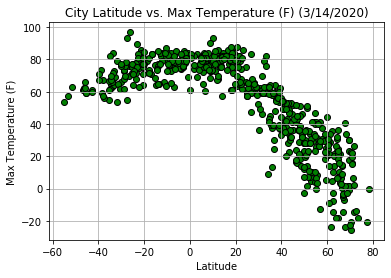

In [17]:
x_axis = lat
y_axis = max_temp
plt.scatter(x_axis, y_axis, marker="o", facecolors="green", edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (F) (%s/%s/%s" % (current_date.month, current_date.day, current_date.year) + ")")

plt.grid(True)
plt.savefig("../Images/TemperaturePlot.png")
plt.show()

#### Latitude vs. Humidity Plot

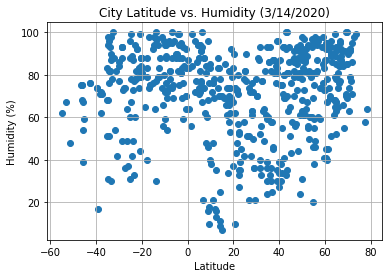

In [21]:
plt.scatter(x_axis, humidity, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (%s/%s/%s" % (current_date.month, current_date.day, current_date.year) + ")")

plt.grid(True)
plt.savefig("../Images/HumidityPlot.png")
plt.show()

#### Latitude vs. Cloudiness Plot

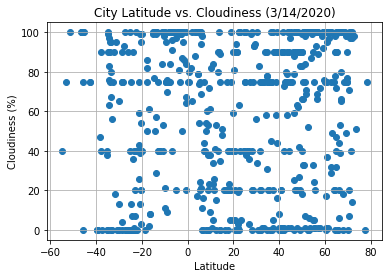

In [22]:
plt.scatter(x_axis, cloudiness, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (%s/%s/%s" % (current_date.month, current_date.day, current_date.year) + ")")

plt.grid(True)
plt.savefig("../Images/CloudinessPlot.png")
plt.show()

#### Latitude vs. Wind Speed Plot

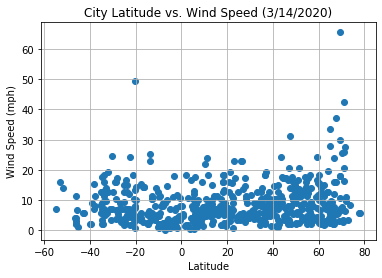

In [23]:
plt.scatter(x_axis, wind_speed, marker = "o")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (%s/%s/%s" % (current_date.month, current_date.day, current_date.year) + ")")

plt.grid(True)
plt.savefig("../Images/WindSpeedPlot.png")
plt.show()

## Linear Regression

In [31]:
# OPTIONAL: Create a function to create Linear Regression plots
# create a function called LinearRegressionPlot with 6 variables - xdata, ydata, xlab (label for x-axis),
# ylab (label for y axis), labpos (position of the label), immagefig (sav file location and name)

def linearregressionplot(xdata,ydata,xlab,ylab,labpo,imagefig):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The r-squared is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(xdata,ydata)
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,labpos,fontsize=15,color="red")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.savefig(f"../Images/{imagefig}.png")
    plt.show()

In [32]:
# Create Northern and Southern Hemisphere DataFrames
# northern hemisphere 
northern = weather_data_final.loc[weather_data_final["Lat"] >= 0.0]
#southern hemisphere
southern = weather_data_final.loc[weather_data_final["Lat"] < 0.0]


,City,Cloudiness,Country,Date,Humidity,Lat,Lon,Max Temp,Wind Speed
1,Ushuaia,40,AR,1584225855,62,-54.80,-68.30,53.6,6.93
2,Bluff,100,NZ,1584225854,75,-46.60,168.33,61.0,4.00
3,Vaini,75,TO,1584226358,79,-21.20,-175.20,86.0,18.34
7,Puerto Ayora,20,EC,1584226202,70,-0.74,-90.35,84.2,8.05
12,Punta Arenas,75,CL,1584226288,67,-53.15,-70.92,57.2,16.11


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8910576910030769


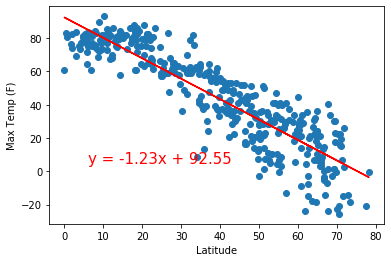

In [39]:
xdata = northern["Lat"]
ydata = northern["Max Temp"]
xlab = "Latitude"
ylab = "Max Temp (F)"
labpos = (6,5)
imagefig = "NH - Max Temp (F) vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.621540631402806


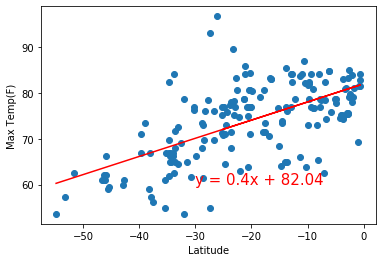

In [40]:
xdata = southern["Lat"]
ydata = southern["Max Temp"]
xlab = "Latitude"
ylab = "Max Temp(F)"
labpos = (-30,60)
imagefig = "SH - Max Temp (F) vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.234874225579394


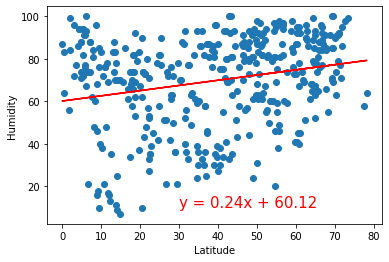

In [41]:
xdata = northern["Lat"]
ydata = northern["Humidity"]
xlab = "Latitude"
ylab = "Humidity"
labpos = (30,10)
imagefig = "NH - Humidity vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32032201741552907


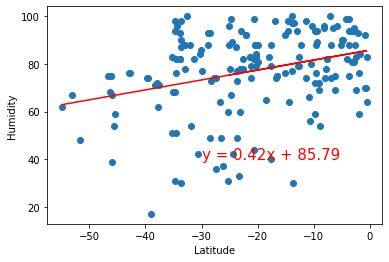

In [43]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlab = "Latitude"
ylab = "Humidity"
labpos = (-30,40)
imagefig = "SH - Humidity vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16469887979023695


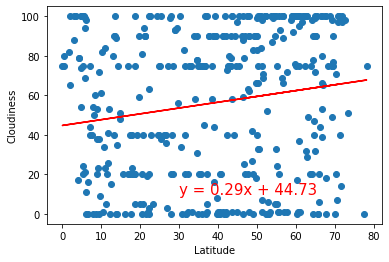

In [44]:
xdata = northern["Lat"]
ydata = northern["Cloudiness"]
xlab = "Latitude"
ylab = "Cloudiness"
labpos = (30,10)
imagefig = "NH - Cloudiness vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32032201741552907


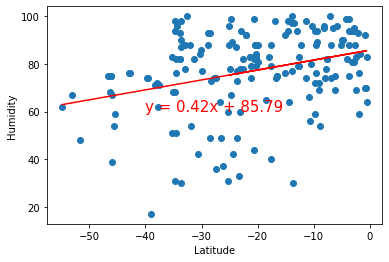

In [46]:
xdata = southern["Lat"]
ydata = southern["Humidity"]
xlab = "Latitude"
ylab = "Humidity"
labpos = (-40,60)
imagefig = "SH - Humidity vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.20167622638314822


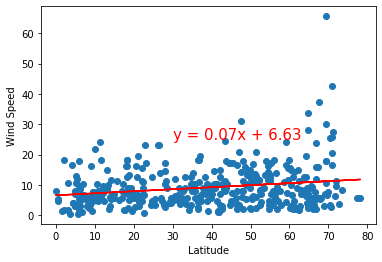

In [47]:
xdata = northern["Lat"]
ydata = northern["Wind Speed"]
xlab = "Latitude"
ylab = "Wind Speed"
labpos = (30,25)
imagefig = "NH - Wind Speed vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.1773466677841557


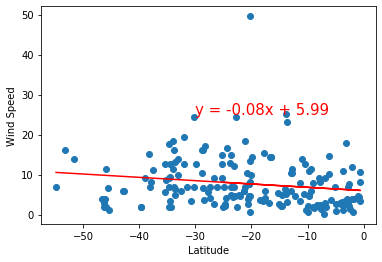

In [48]:
xdata = southern["Lat"]
ydata = southern["Wind Speed"]
xlab = "Latitude"
ylab = "Wind Speed"
labpos = (-30,25)
imagefig = "SH - Wind Speed vs. Latitude Regression"
linearregressionplot(xdata,ydata,xlab,ylab,labpos,imagefig)